# Setup and Install Packages

In [37]:
# Install necessary libraries in Colab
!pip install yfinance matplotlib pandas scikit-learn textblob vaderSentiment seaborn


# Define Stock Tickers


In [38]:
# List of 10 top NSE companies
tickers = [
    'RELIANCE.NS',    # Reliance Industries
    'TCS.NS',         # Tata Consultancy Services
    'INFY.NS',        # Infosys
    'HDFCBANK.NS',    # HDFC Bank
    'ICICIBANK.NS',   # ICICI Bank
    'BHARTIARTL.NS',  # Bharti Airtel
    'HINDUNILVR.NS',  # Hindustan Unilever
    'SBIN.NS',        # State Bank of India
    'KOTAKBANK.NS',   # Kotak Mahindra Bank
    'ITC.NS'          # ITC Limited
]


# Download and Save Historical Data

In [39]:
import yfinance as yf
import pandas as pd

# Download historical data and save as CSV
for ticker in tickers:
    print(f"Fetching {ticker} data...")
    df = yf.download(ticker, period='5y', progress=False)
    if df.empty:
        print(f"WARNING: No data found for {ticker}. Skipping.")
        continue
    df.reset_index(inplace=True)
    df['Ticker'] = ticker
    filename = f"{ticker.replace('.', '_')}_prices.csv"
    df.to_csv(filename, index=False)
print("All data fetched and saved as CSV.")


Fetching RELIANCE.NS data...


/tmp/ipython-input-3183459395.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='5y', progress=False)


Fetching TCS.NS data...


/tmp/ipython-input-3183459395.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='5y', progress=False)


Fetching INFY.NS data...


/tmp/ipython-input-3183459395.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='5y', progress=False)


Fetching HDFCBANK.NS data...


/tmp/ipython-input-3183459395.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='5y', progress=False)


Fetching ICICIBANK.NS data...


/tmp/ipython-input-3183459395.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='5y', progress=False)


Fetching BHARTIARTL.NS data...


/tmp/ipython-input-3183459395.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='5y', progress=False)


Fetching HINDUNILVR.NS data...


/tmp/ipython-input-3183459395.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='5y', progress=False)


Fetching SBIN.NS data...


/tmp/ipython-input-3183459395.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='5y', progress=False)


Fetching KOTAKBANK.NS data...


/tmp/ipython-input-3183459395.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='5y', progress=False)


Fetching ITC.NS data...


/tmp/ipython-input-3183459395.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='5y', progress=False)


All data fetched and saved as CSV.


# Load Data and Generate Technical Features

In [40]:
import pandas as pd

def add_features(csv_path):
    df = pd.read_csv(csv_path)
    # Convert 'Date' to datetime objects
    df['Date'] = pd.to_datetime(df['Date'])
    # Ensure 'Close' is numeric, coercing errors
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['Returns'] = df['Close'].pct_change()
    df = df.dropna()
    df.to_csv(csv_path.replace('.csv', '_processed.csv'), index=False)
    return df

In [41]:
# Generate features for each stock
for ticker in tickers:
    path = f"{ticker.replace('.', '_')}_prices.csv"
    try:
        add_features(path)
    except Exception as e:
        print(f"Error in {ticker}: {e}")
print("Feature engineering complete for all stocks.")

Feature engineering complete for all stocks.


# Visualize Stock Trends

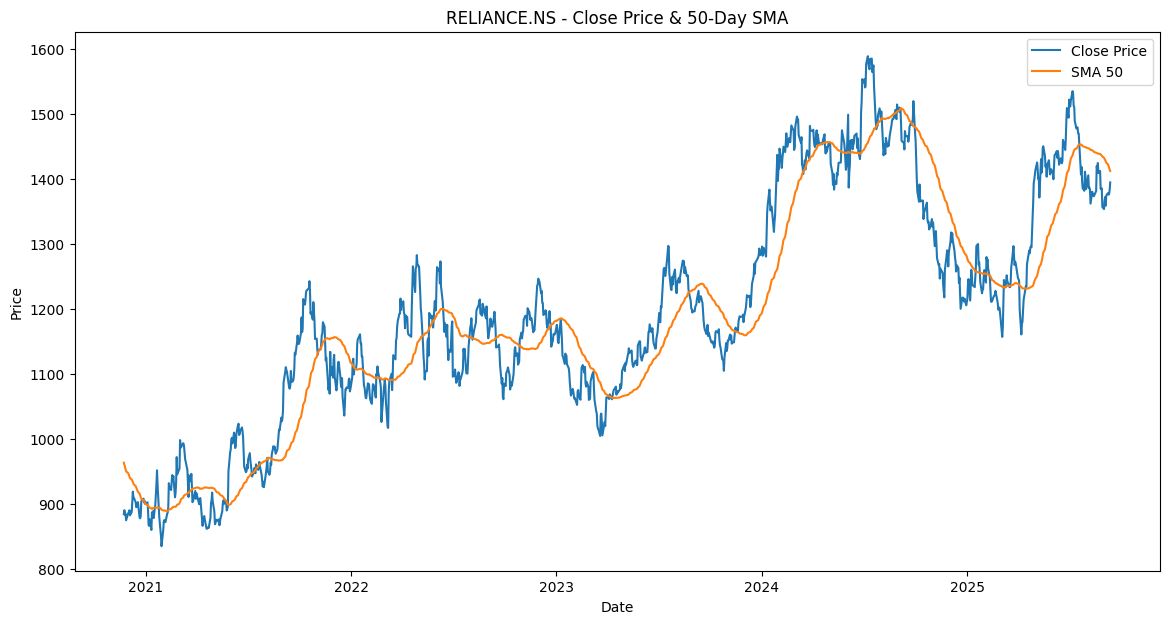

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Visualize RELIANCE.NS
# Load the processed data with the correct filename
try:
    df = pd.read_csv('RELIANCE_NS_prices_processed.csv')
    # Convert 'Date' to datetime objects for plotting
    df['Date'] = pd.to_datetime(df['Date'])
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.plot(df['Date'], df['SMA_50'], label='SMA 50')
    plt.title('RELIANCE.NS - Close Price & 50-Day SMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
except FileNotFoundError:
    print("Error: The processed data file was not found. Please ensure the feature engineering step completed successfully.")
except Exception as e:
    print(f"An error occurred during plotting: {e}")

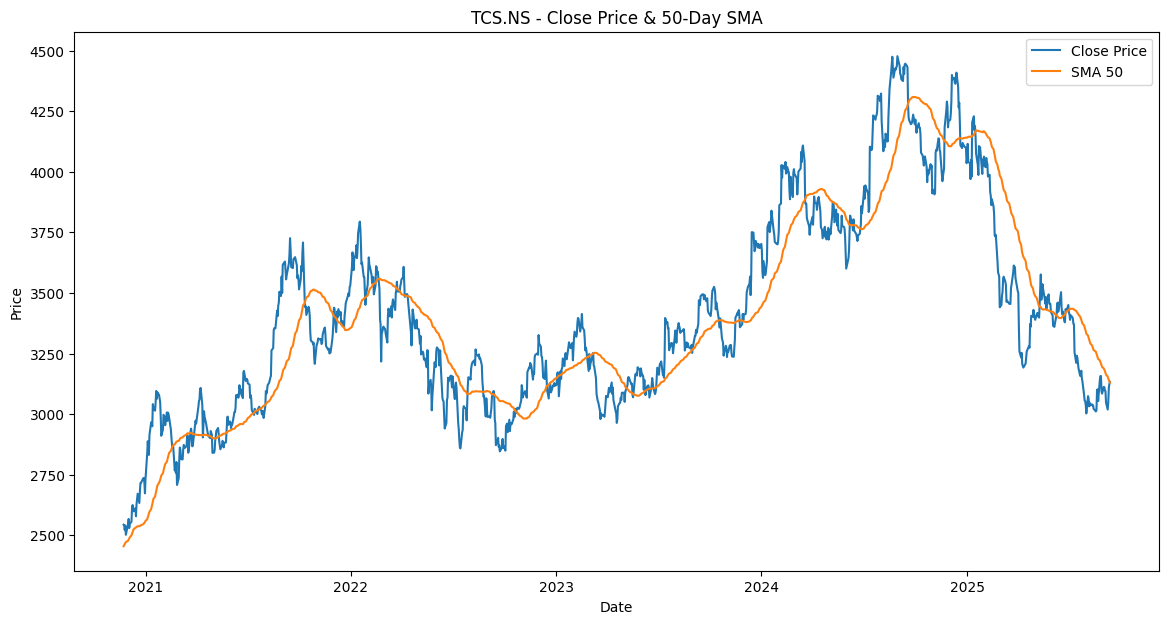

In [43]:
# Visualize TCS.NS


try:
    df = pd.read_csv('TCS_NS_prices_processed.csv')
    # Convert 'Date' to datetime objects for plotting
    df['Date'] = pd.to_datetime(df['Date'])
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.plot(df['Date'], df['SMA_50'], label='SMA 50')
    plt.title('TCS.NS - Close Price & 50-Day SMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
except FileNotFoundError:
    print("Error: The processed data file was not found. Please ensure the feature engineering step completed successfully.")
except Exception as e:
    print(f"An error occurred during plotting: {e}")

# Sample Sentiment Analysis

In [44]:
from textblob import TextBlob

example_news = [
    "Reliance Industries posts record quarterly results.",
    "ICICI Bank to face increased competition in retail banking.",
    "ITC shares jump as market sentiment improves.",
    "HDFC Bank suffers losses after regulatory action."
]

for headline in example_news:
    score = TextBlob(headline).sentiment.polarity
    print(f"Headline: {headline}")
    print(f"Sentiment Score: {score:.2f}\n")


Headline: Reliance Industries posts record quarterly results.
Sentiment Score: 0.00

Headline: ICICI Bank to face increased competition in retail banking.
Sentiment Score: 0.00

Headline: ITC shares jump as market sentiment improves.
Sentiment Score: 0.00

Headline: HDFC Bank suffers losses after regulatory action.
Sentiment Score: -0.25



# Price Prediction Model Training

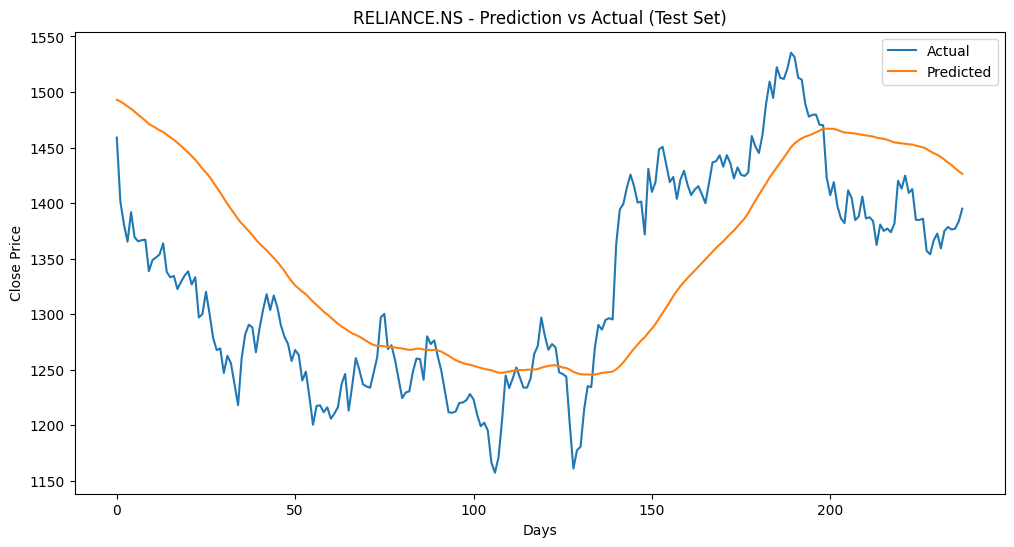

Test RMSE: 78.36


In [45]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Load processed data for RELIANCE
df = pd.read_csv('RELIANCE_NS_prices_processed.csv')

X = df[['SMA_50']].values  # Use the SMA_50 as feature
y = df['Close'].values

# Split into train-test sets (last 20% as test)
split_idx = int(0.8 * len(df))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate and visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_test)), preds, label='Predicted')
plt.title('RELIANCE.NS - Prediction vs Actual (Test Set)')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"Test RMSE: {rmse:.2f}")


# Modeling for all 10 Companies

In [46]:
from sklearn.linear_model import LinearRegression
import numpy as np

results = []
for ticker in tickers:
    try:
        file = f"{ticker.replace('.', '_')}_prices_processed.csv"
        df = pd.read_csv(file)
        X = df[['SMA_50']].values
        y = df['Close'].values
        split_idx = int(0.8 * len(df))
        X_train, X_test = X[:split_idx], X[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]
        model = LinearRegression().fit(X_train, y_train)
        preds = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        results.append({
            'Ticker': ticker,
            'Test_RMSE': round(rmse, 2),
            'Coefficient': round(model.coef_[0], 2)
        })
    except Exception as e:
        print(f"Error with {ticker}: {e}")

result_df = pd.DataFrame(results)
print(result_df)


          Ticker  Test_RMSE  Coefficient
0    RELIANCE.NS      78.36         1.00
1         TCS.NS     238.77         0.99
2        INFY.NS     104.92         0.93
3    HDFCBANK.NS      47.66         0.87
4   ICICIBANK.NS      47.29         1.00
5  BHARTIARTL.NS     101.59         1.09
6  HINDUNILVR.NS     130.18         0.94
7        SBIN.NS      33.27         0.97
8   KOTAKBANK.NS     133.87         0.49
9         ITC.NS      23.91         1.01


In [47]:
import pandas as pd
import numpy as np

def add_technical_indicators(csv_path):
    df = pd.read_csv(csv_path)
    # Ensure 'Close' is numeric, coercing errors
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df = df.dropna(subset=['Close']) # Drop rows where Close is NaN

    # --- SMA ---
    df['SMA_50'] = df['Close'].rolling(window=50).mean()

    # --- EMA ---
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()    # 20-day EMA

    # --- RSI ---
    window = 14
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    RS = avg_gain / avg_loss
    df['RSI_14'] = 100 - (100 / (1 + RS))

    # --- Bollinger Bands ---
    sma_20 = df['Close'].rolling(window=20).mean()
    std_20 = df['Close'].rolling(window=20).std()
    df['Bollinger_Upper'] = sma_20 + (2 * std_20)
    df['Bollinger_Lower'] = sma_20 - (2 * std_20)

    # --- Daily Returns ---
    df['Returns'] = df['Close'].pct_change()

    df = df.dropna()
    df.to_csv(csv_path.replace('.csv', '_tech.csv'), index=False)
    return df

# Apply for all stocks
for ticker in tickers:
    in_file = f"{ticker.replace('.', '_')}_prices.csv"
    try:
        add_technical_indicators(in_file)
    except Exception as e:
        print(f"Error in {ticker}: {e}")
print("Technical indicators added for all stocks.")

Technical indicators added for all stocks.


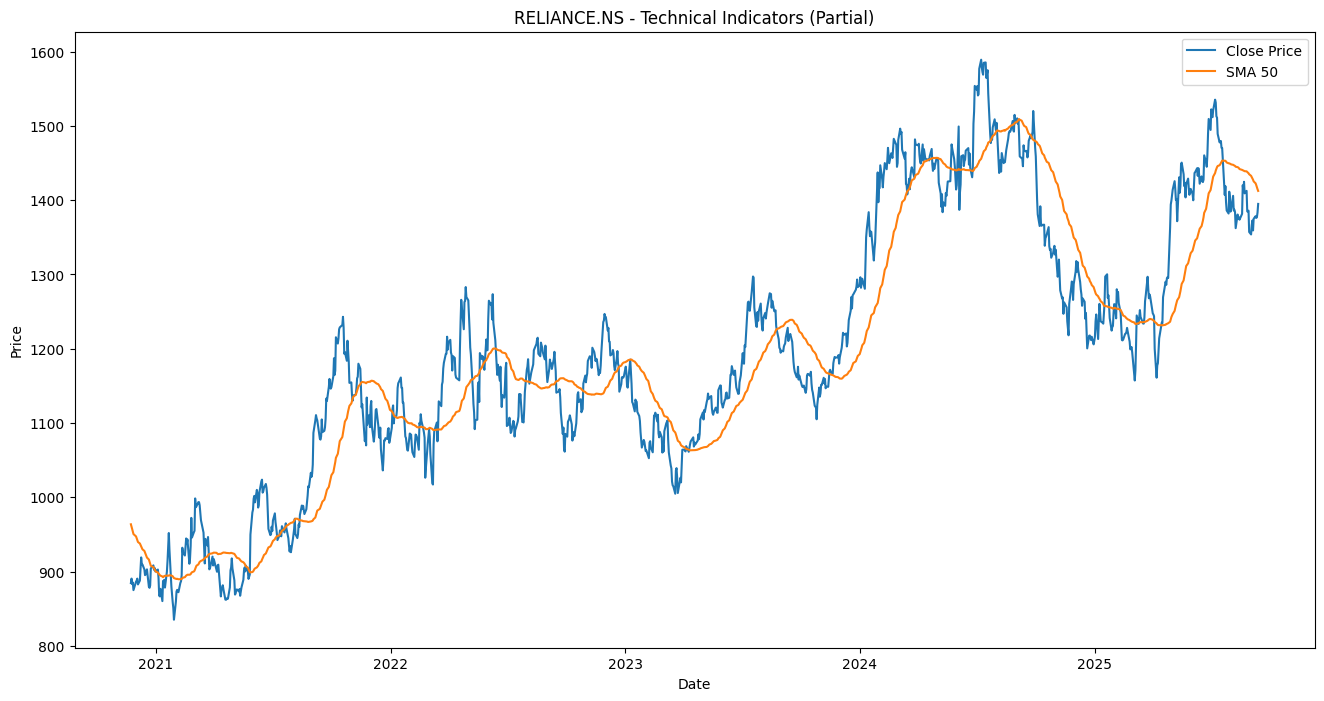

In [48]:
df = pd.read_csv('RELIANCE_NS_prices_processed.csv')

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
# Convert 'Date' to datetime objects for plotting
df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'], df['Close'], label='Close Price')
# Assuming the technical indicators were added to this processed file in the previous step
# Replace with the actual column names if they are different
plt.plot(df['Date'], df['SMA_50'], label='SMA 50')
# Add other indicators if they were successfully generated and saved
# plt.plot(df['Date'], df['EMA_20'], label='EMA 20')
# plt.plot(df['Date'], df['Bollinger_Upper'], label='Bollinger Upper', linestyle='--')
# plt.plot(df['Date'], df['Bollinger_Lower'], label='Bollinger Lower', linestyle='--')

plt.title('RELIANCE.NS - Technical Indicators (Partial)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

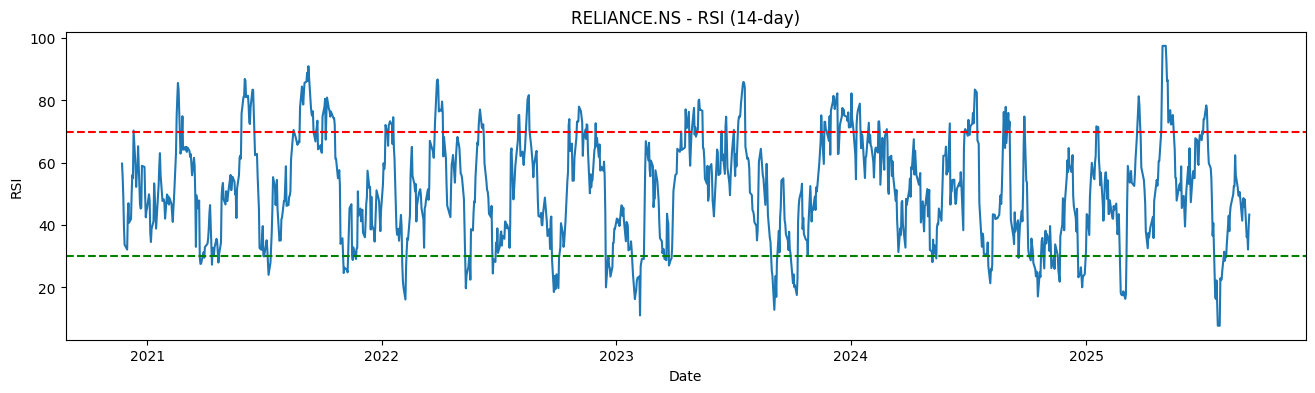

In [49]:
df = pd.read_csv('RELIANCE_NS_prices_tech.csv')
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(16,4))
plt.plot(df['Date'], df['RSI_14'])
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RELIANCE.NS - RSI (14-day)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()

# Plotly Interactive Charts

### interactive Candlestick & Moving Averages

In [61]:
import plotly.graph_objects as go

# Shorten data for performance in notebook
df_short = df.tail(200)  # Last ~10 months

fig = go.Figure(data=[
    go.Candlestick(
        x=df_short['Date'],
        open=df_short['Open'],
        high=df_short['High'],
        low=df_short['Low'],
        close=df_short['Close'],
        name='Candlesticks'
    )]
)

fig.add_trace(
    go.Scatter(x=df_short['Date'], y=df_short['SMA_50'], line=dict(color='blue'), name='SMA 50')
)
fig.add_trace(
    go.Scatter(x=df_short['Date'], y=df_short['EMA_20'], line=dict(color='orange'), name='EMA 20')
)

fig.update_layout(
    title='RELIANCE.NS - Interactive Candlestick, SMA, EMA',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    template="plotly_white"
)
fig.show()



### Plotly RSI Interactive Line

In [62]:
import plotly.express as px

fig = px.line(df_short, x='Date', y='RSI_14', title='RELIANCE.NS - RSI (14)')
fig.add_hline(y=70, line_dash="dash", line_color="red", annotation_text="Overbought")
fig.add_hline(y=30, line_dash="dash", line_color="green", annotation_text="Oversold")
fig.show()
